## Historical Simulation Method
#### Point and Path Estimation

#### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import random as rd
import yfinance as yf
from datetime import datetime as dt, date, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
spotData = yf.download(tickers='^NSEI',start=date(2021, 1, 1), end=date.today(),auto_adjust=False,multi_level_index=False)['Adj Close']
spotPrice = spotData.tail(1).values[0]
spotReturns = np.array(spotData.pct_change().iloc[1:].values)

print(spotPrice)
print(len(spotReturns),spotReturns)

[*********************100%***********************]  1 of 1 completed

24793.25
1101 [ 0.00816067  0.00471238 -0.00375013 ... -0.00373197 -0.00166374
 -0.00075773]


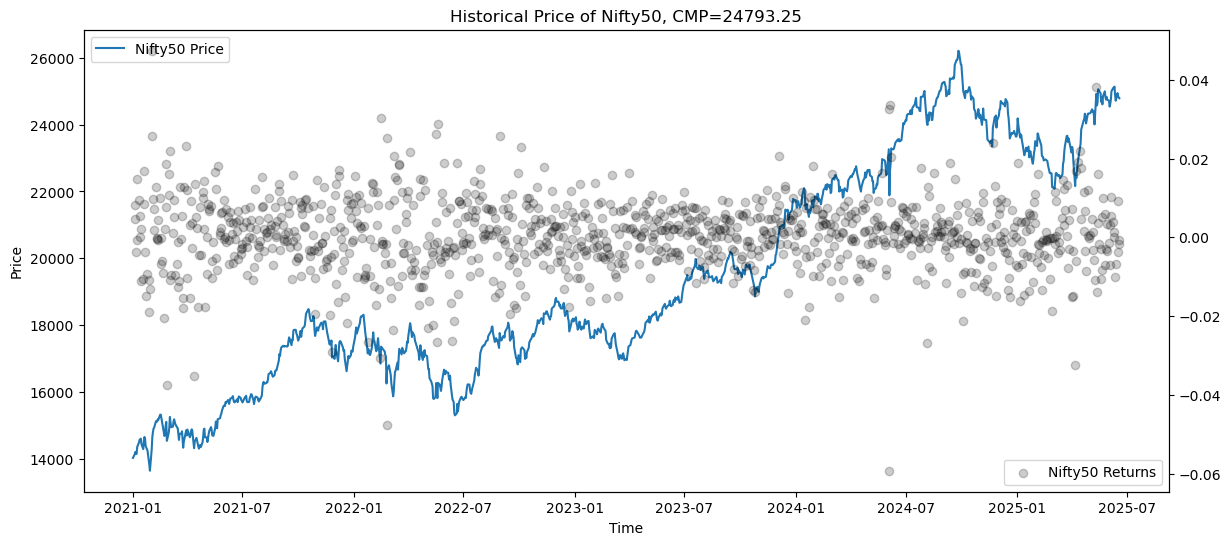

In [11]:
plt.figure(figsize=(14,6))
plt.plot(spotData, label='Nifty50 Price')
plt.title(f'Historical Price of Nifty50, CMP={spotPrice}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')

plt.twinx()
plt.scatter(x=spotData.iloc[1:].index, y= spotReturns, color='k', alpha=0.2, label='Nifty50 Returns')
plt.legend(loc='lower right')
plt.show()

In [13]:
print(np.random.choice(spotReturns))

0.006281634763507293


In [17]:
print(rd.choice(spotReturns))

0.0012466303397029588


In [19]:
print(spotPrice + (1+np.random.choice(spotReturns)))

24794.26618930682


In [21]:
simulatuions = 10000
sampleReturns = np.random.choice(spotReturns, size = simulatuions)
print(len(sampleReturns), sampleReturns)

10000 [-0.00169371 -0.00704383  0.00143803 ... -0.00251614 -0.01172294
 -0.01960337]


### Point Estimation

In [23]:
simulatedPrices = np.array([spotPrice * ( 1 + ret) for ret in sampleReturns])
print(len(simulatedPrices),simulatedPrices)

10000 [24751.25743903 24618.61047804 24828.90355696 ... 24730.86673089
 24502.60032961 24307.21869468]


In [26]:
print('Price Estimate:',simulatedPrices.mean())

Price Estimate: 24807.549544463982


In [28]:
print('Expected Return:',((simulatedPrices.mean()-spotPrice)/spotPrice))

Expected Return: 0.000576751513576553


### Path Estimation

In [42]:
simulatedPath = [spotPrice]

for t in range(252):
    simulatedPrice = simulatedPath[t]*(1+np.random.choice(spotReturns))
    simulatedPath.append(simulatedPrice)   

print(len(simulatedPath),simulatedPath)

253 [24793.25, 24478.71160894692, 24655.05257730931, 24562.592874521062, 24380.321599775572, 24796.273011682544, 24966.804319904095, 24964.03608084322, 24646.648976355344, 25358.716268080458, 25807.14654238318, 26086.228202425147, 25789.073665785018, 27012.082087067607, 27202.124860534896, 27269.091278895467, 27357.36504111105, 27553.83248734184, 27588.645600137283, 27454.981142174398, 27770.260375950158, 27953.484132838843, 27897.77547966554, 27792.967580111523, 27540.754262980052, 27678.009063068188, 26947.870127975966, 27078.617715158678, 27058.316437966085, 26842.068019045997, 27320.7472683383, 27330.85775775919, 27273.421735286913, 27233.195243300244, 27236.792396213623, 26983.97368271822, 27075.0892678359, 27894.357815848824, 27862.25728761092, 27727.394193737073, 27517.496885490582, 27622.38709694947, 27325.752704941136, 26748.401963835557, 26745.436186951036, 26525.822114959243, 26475.005830608916, 26254.225982919856, 26317.18032941547, 26479.575546923963, 26084.17237788579, 26

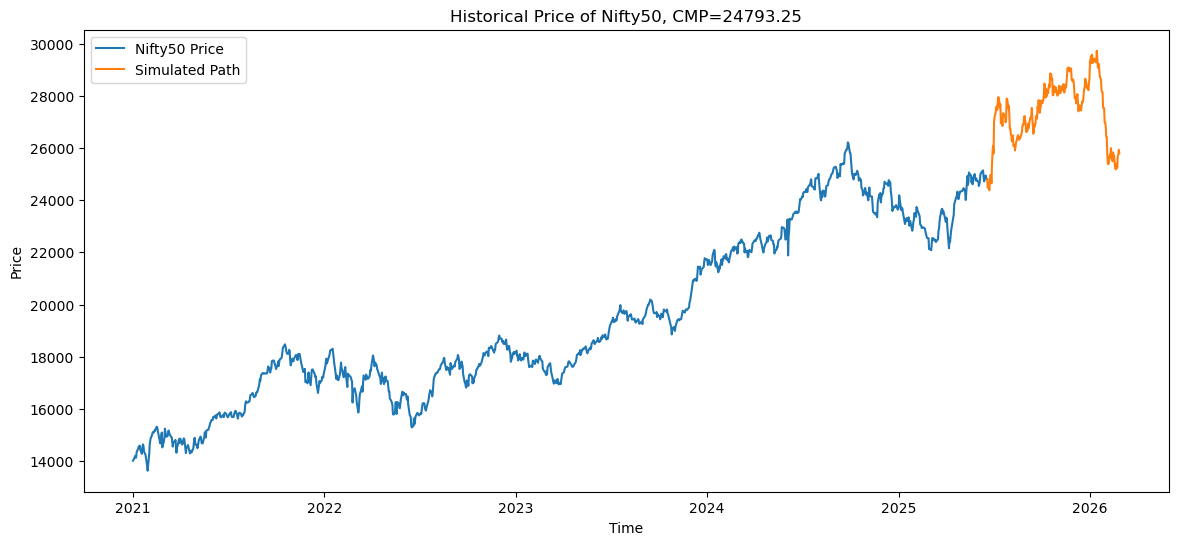

In [44]:
plt.figure(figsize=(14,6))
plt.plot(spotData, label='Nifty50 Price')

plt.plot([spotData.tail(1).index[0]+timedelta(t) for t in range(253)], simulatedPath, label='Simulated Path')

plt.title(f'Historical Price of Nifty50, CMP={spotPrice}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()